In [9]:
import nideconv
from risk_experiment.utils.data import Subject, get_all_subjects
from risk_experiment.utils.math import resample_run

import pandas as pd
from scipy.stats import zscore
from tqdm import tqdm

ImportError: cannot import name 'qdm' from 'tqdm' (/Users/gdehol/mambaforge/lib/python3.10/site-packages/tqdm/__init__.py)

In [ ]:
for sub in 

In [8]:
pupil = pd.concat([sub.get_pupil('3t2') for sub in get_all_subjects('/data/ds-risk')])

FileNotFoundError: [Errno 2] No such file or directory: '/data/ds-risk/derivatives/pupil_preproc/sub-14/ses-3t2/func/sub-14_ses-3t2_run-1_pupil.tsv.gz'

In [ ]:
pupil

In [2]:
pupil = Subject('32', '/data/ds-risk').get_pupil('3t2')
saccades = Subject('32', '/data/ds-risk').get_saccades('3t2')
blinks = Subject('32', '/data/ds-risk').get_blinks('3t2')

onsets = pd.concat((blinks, saccades), keys=['blink', 'saccade'], names=['event_type']).reset_index('event_type')[['event_type', 'onset']]

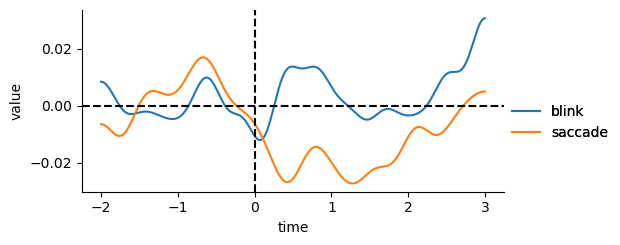

In [3]:
grf = nideconv.GroupResponseFitter(pupil['pupil'], onsets=onsets, input_sample_rate=20)

grf.add_event('saccade', interval=[-2, 3], basis_set='dct', n_regressors=24)
grf.add_event('blink', interval=[-2, 3], basis_set='dct', n_regressors=24)

grf.fit()

grf.plot_groupwise_timecourses()

In [4]:
grf.onsets

n    onset
subject run event_type              
32      1   blink         0    7.694
            blink         1    9.054
            blink         2    9.808
            blink         3    9.897
            blink         4   11.293
...                     ...      ...
        8   saccade     513  368.384
            saccade     514  368.646
            saccade     515  369.076
            saccade     516  369.402
            saccade     517  369.854

[7058 rows x 2 columns]

/Users/gdehol/git/nideconv/nideconv/regressors.py:312: UserWarning: Number of FIR regressors has automatically been set to 140 per covariate
  warnings.warn('Number of FIR regressors has automatically been set to %d '
/Users/gdehol/git/nideconv/nideconv/regressors.py:312: UserWarning: Number of FIR regressors has automatically been set to 140 per covariate
  warnings.warn('Number of FIR regressors has automatically been set to %d '
/Users/gdehol/git/nideconv/nideconv/regressors.py:312: UserWarning: Number of FIR regressors has automatically been set to 140 per covariate
  warnings.warn('Number of FIR regressors has automatically been set to %d '
/Users/gdehol/git/nideconv/nideconv/regressors.py:312: UserWarning: Number of FIR regressors has automatically been set to 140 per covariate
  warnings.warn('Number of FIR regressors has automatically been set to %d '
/Users/gdehol/git/nideconv/nideconv/regressors.py:312: UserWarning: Number of FIR regressors has automatically been set to 140 p

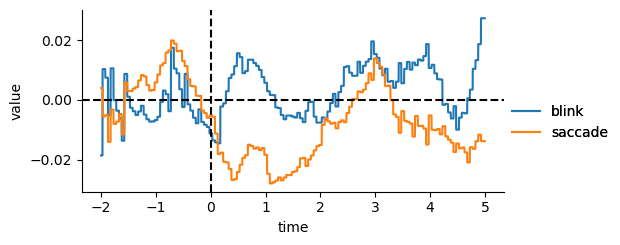

In [5]:
grf = nideconv.GroupResponseFitter(pupil['pupil'], onsets=onsets, input_sample_rate=20)

grf.add_event('saccade', interval=[-2, 5])
grf.add_event('blink', interval=[-2, 5])

grf.fit()

grf.plot_groupwise_timecourses()